<a href="https://colab.research.google.com/github/Chaitanya0604/Stock-Market-predicton/blob/main/StockMarketPredictionUsingYahooFinance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM).

This program predicts the closing stock price of a corporation(Google Inc.) using the past 60 day stock price.

In [ ]:
#Import the libraries
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


In [ ]:
#Get the stock data file
df=pd.read_csv('/content/drive/MyDrive/Sparks Foundation/GOOGL (1).csv')
#show the data
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-08-17,688.039978,694.739990,683.059998,694.109985,694.109985,1234000
1,2015-08-18,691.070007,695.760010,685.320007,688.729980,688.729980,1385500
2,2015-08-19,690.109985,700.200012,686.799988,694.039978,694.039978,2509700
3,2015-08-20,689.099976,696.159973,675.280029,679.479980,679.479980,2889900
4,2015-08-21,671.039978,672.890015,643.099976,644.030029,644.030029,4594000
5,2015-08-24,600.599976,627.679993,593.090027,618.109985,618.109985,6489400
6,2015-08-25,646.469971,647.000000,611.669983,612.469971,612.469971,3571500
7,2015-08-26,643.099976,662.479980,630.369995,659.739990,659.739990,4387000
8,2015-08-27,671.989990,673.979980,651.099976,667.960022,667.960022,2948700
9,2015-08-28,665.760010,667.000000,653.750000,659.690002,659.690002,1941800


In [ ]:
df.tail(10)

,Date,Open,High,Low,Close,Adj Close,Volume
1478,2021-06-30,2439.889893,2445.139893,2427.090088,2441.790039,2441.790039,1223700
1479,2021-07-01,2434.500000,2451.739990,2430.629883,2448.889893,2448.889893,905500
1480,2021-07-02,2463.000000,2508.080078,2461.189941,2505.149902,2505.149902,1299100
1481,2021-07-06,2512.969971,2528.560059,2491.649902,2523.800049,2523.800049,1320200
1482,2021-07-07,2543.239990,2545.679932,2523.060059,2529.479980,2529.479980,1203000
1483,2021-07-08,2480.520020,2511.909912,2480.439941,2500.879883,2500.879883,1189500
1484,2021-07-09,2500.500000,2514.689941,2491.030029,2510.370117,2510.370117,931600
1485,2021-07-12,2523.560059,2541.389893,2512.219971,2539.510010,2539.510010,883400
1486,2021-07-13,2540.770020,2561.149902,2533.489990,2546.830078,2546.830078,962000
1487,2021-07-14,2559.159912,2586.530029,2558.290039,2564.739990,2564.739990,1187100


In [ ]:
#Get number of rows and columns in the data set
df.shape

(1488, 7)

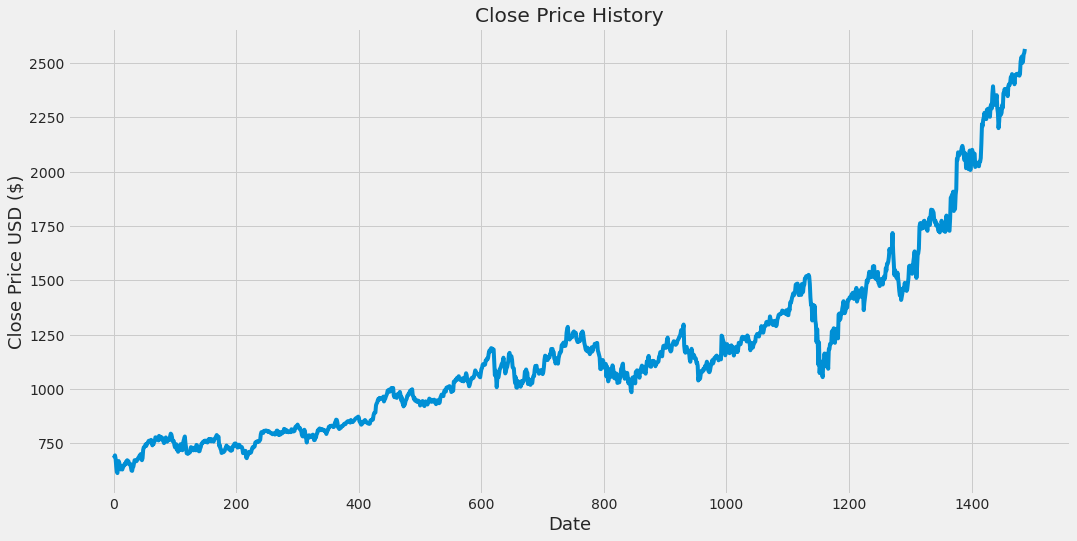

In [ ]:
#visualise closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()

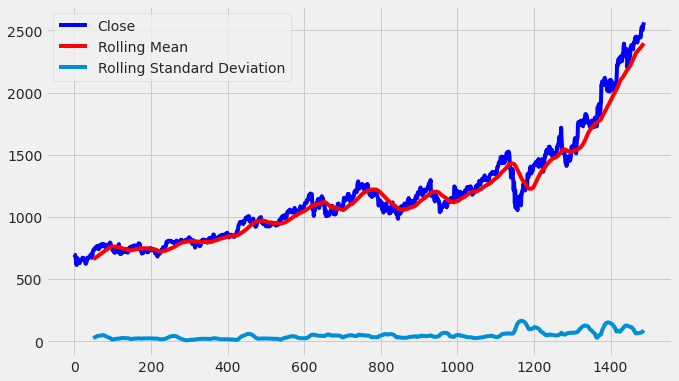

In [ ]:
#Plotting moving average
close = df['Close']
ma = close.rolling(window = 50).mean()
std = close.rolling(window = 50).std()

plt.figure(figsize=(10, 6))
df['Close'].plot(color = 'b', label = 'Close')
ma.plot(color = 'r', label = 'Rolling Mean')
std.plot(label = 'Rolling Standard Deviation')
plt.legend()

Text(0.5, 1.0, 'Returns')

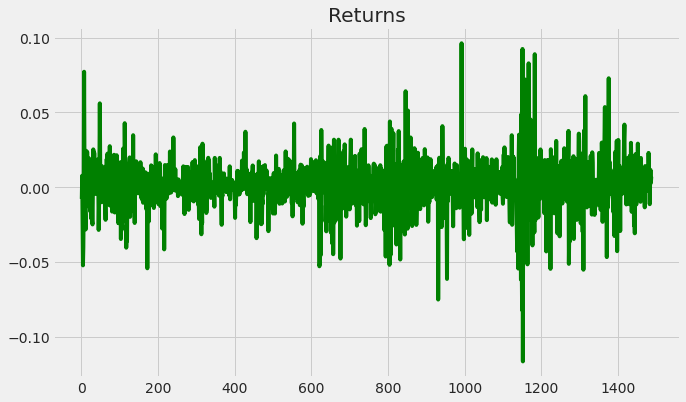

In [ ]:
#Plotting returns
returns = close / close.shift(1) - 1

plt.figure(figsize = (10,6))
returns.plot(label='Return', color = 'g')
plt.title("Returns")

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Return')

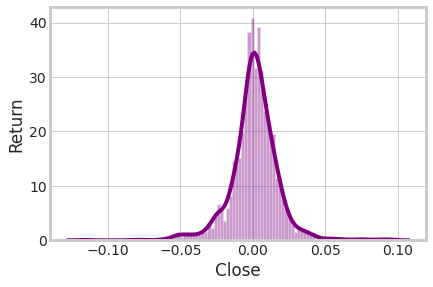

In [ ]:
import seaborn as sns
sns.set_style('whitegrid')
sns.distplot(returns, bins=100, color='purple')
plt.ylabel('Return')

In [ ]:
#Create a new dataframe with only 'Close' column
data=df.filter(['Close'])
#Convert the dataframe to numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

1191

In [ ]:
#Scaling the data(pre-processing transformation)
scaler=MinMaxScaler(feature_range=(0,1))#inclusive of 0 and 1
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.04181799],
       [0.03906222],
       [0.04178213],
       ...,
       [0.98707659],
       [0.99082611],
       [1.        ]])

In [ ]:
scaled_data.shape

(1488, 1)

In [ ]:
#Create the training data set
#Create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train=[]#empty list
y_train=[]#empty list
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])#position 0 to 59
  y_train.append(train_data[i,0])#from position 60
  if(i<=61):
      print(x_train)
      print(y_train)
      print()



[array([0.04181799, 0.03906222, 0.04178213, 0.03432415, 0.01616583,
       0.00288895, 0.        , 0.02421285, 0.02842335, 0.02418724,
       0.01810714, 0.00875393, 0.01661655, 0.01259048, 0.0084466 ,
       0.01608898, 0.01584822, 0.019777  , 0.02193857, 0.02048897,
       0.02694301, 0.02717352, 0.03032368, 0.02481727, 0.02792135,
       0.02086291, 0.020909  , 0.0217388 , 0.01417839, 0.00603402,
       0.00519396, 0.01326662, 0.015126  , 0.02280423, 0.03032881,
       0.03030833, 0.02946827, 0.0279316 , 0.03010343, 0.03276187,
       0.03621426, 0.03480051, 0.04125969, 0.0424378 , 0.0448094 ,
       0.03459052, 0.03039027, 0.03517446, 0.0547363 , 0.06077542,
       0.0616462 , 0.06374631, 0.06780825, 0.06398707, 0.06928858,
       0.06984179, 0.07316612, 0.07591164, 0.076388  , 0.07288953])]
[0.07467718992820321]

[array([0.04181799, 0.03906222, 0.04178213, 0.03432415, 0.01616583,
       0.00288895, 0.        , 0.02421285, 0.02842335, 0.02418724,
       0.01810714, 0.00875393, 0.01

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train=np.array(x_train),np.array(y_train)

In [ ]:
x_train.shape

(1131, 60)

In [ ]:
#Reshape the data
#LSTM needs three dimension but our x_train is 2-dimensional
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))#Number of samples= number of rows,number of time-steps=number of columns, number of features=close-price
x_train.shape

(1131, 60, 1)

In [ ]:
#Build the LSTM Model
model=Sequential()
model.add(LSTM(50, return_sequences=True,input_shape=(x_train.shape[1],1)))#50 neurons, we are going to use LSTM Model after this
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))#Densely connected neural network with 25 neurons
model.add(Dense(1))

In [ ]:
#Compile the model
model.compile(optimizer='adam',loss='mean_squared_error')#optimiser used to improve upon loss function, loss function is for how well he model got trained


In [ ]:
#Train model
model.fit(x_train,y_train,batch_size=1,epochs=1)#epochs is number of iteration when model is passsed through the neural network.batch_size is the number of samples we pass through the model

1131/1131 [==============================] - 33s 26ms/step - loss: 0.0012


In [ ]:
#Create the testing data set
#Create a new array containing scaled values from 1543 to 2003
test_data=scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
  x_test.append(test_data[i-60:i,0])



In [ ]:
#Convert the data set to numpy array
x_test=np.array(x_test)

In [ ]:
#Reshape the data to three-dimensional
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)#It should contain same values as y_test dataset

In [ ]:
#Evaluate the model prediction using Root Mean Squared Error(RMSE). Accuracy, standard deviation, and lower values of RMSE indicate a better fit
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

41.81269028911512

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


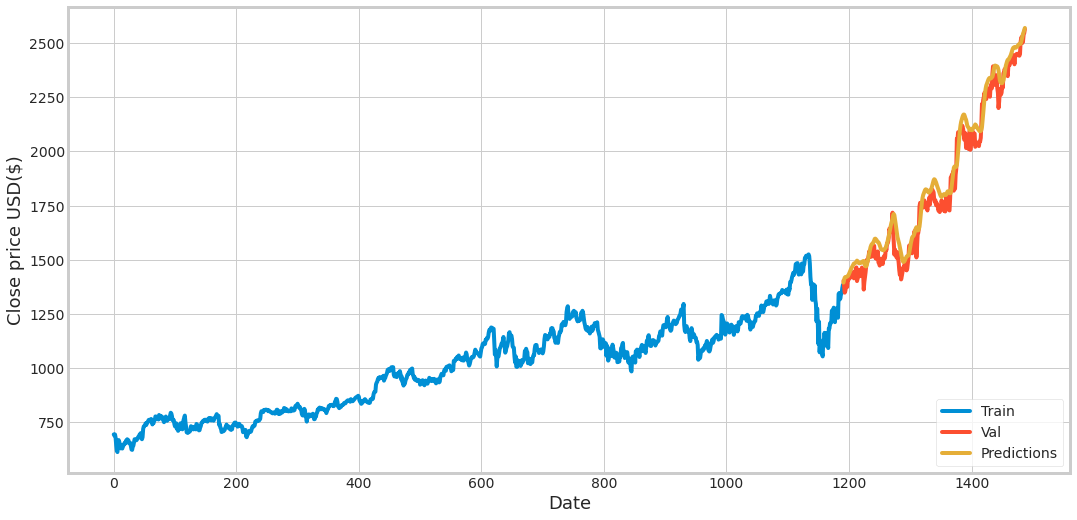

In [ ]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'],loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
1191,1403.589966,1394.561157
1192,1375.180054,1408.251831
1193,1348.329956,1417.688232
1194,1356.859985,1420.512451
1195,1373.060059,1420.504761
...,...,...
1483,2500.879883,2534.007812
1484,2510.370117,2543.764160
1485,2539.510010,2551.175049
1486,2546.830078,2560.385986


In [ ]:

#Create a new dataframe
new_df=df.filter(['Close'])
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values
#Scale the data to values between 0 and 1
last_60_days_scaled=scaler.transform(last_60_days)
#Create an empty list
X_test=[]
#Append the past 60 days
X_test.append(last_60_days_scaled)
#Convert X_test data set to numpy array
X_test=np.array(X_test)
#Reshape the data
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
#Get the predicted scaled price
pred_price=model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price) #Predicting the price for the date '2021-07-15'

[[2580.8533]]


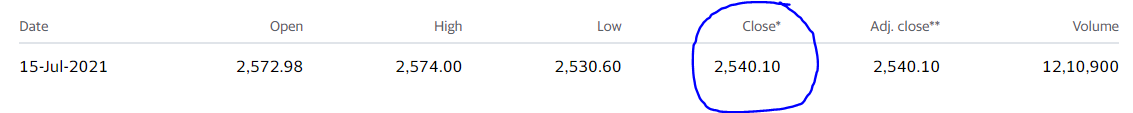